<a href="https://colab.research.google.com/github/MichaelOforgu/Vehicle-Image-Classification-Using-Deep-Learning/blob/main/vehicle_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Image Classification Using Deep Learning

This project focuses on classifying images of cars and motorcycles using deep learning techniques. The model was trained to distinguish between these two vehicle types, leveraging TensorFlow, Keras, GPU acceleration, and OpenCV for image pre-processing.

# Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/DeepLearningProjects/VehicleClassification/')

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/cars/car_24.jpg
Image not in ext list data/cars/car_42.png
Image not in ext list data/cars/car_13.jpg
Image not in ext list data/cars/.DS_Store
Image not in ext list data/motorcycle/motorcycle_64.webp
Image not in ext list data/motorcycle/motorcycle_63.webp
Image not in ext list data/motorcycle/motorcycle_22.jpg
Image not in ext list data/motorcycle/motorcycle_58.jpg
Image not in ext list data/motorcycle/motorcycle_57.JPG.jpg
Image not in ext list data/motorcycle/motorcycle_47.jpg
Image not in ext list data/motorcycle/motorcycle_54.webp
Image not in ext list data/motorcycle/motorcycle_46.jpg
Image not in ext list data/motorcycle/motorcycle_45.webp
Image not in ext list data/motorcycle/motorcycle_41.webp
Image not in ext list data/motorcycle/motorcycle_35.jpg
Image not in ext list data/motorcycle/.DS_Store


# Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 329 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

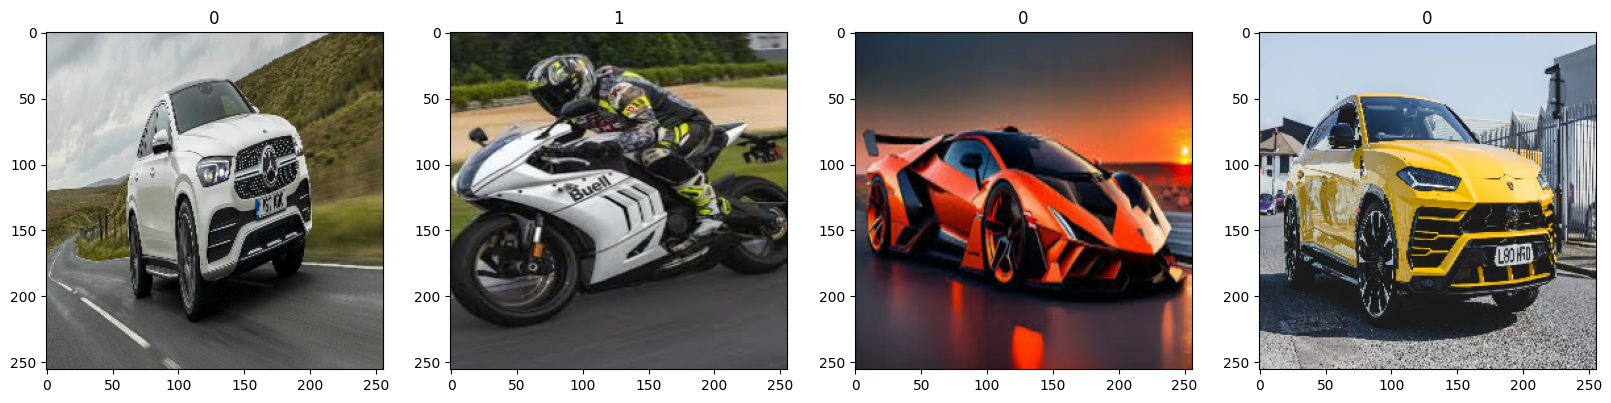

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 1 = Motorcycle

Class 0 = Car

# Preprocessing

# Scale Data

In [15]:
data = data.map(lambda x, y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

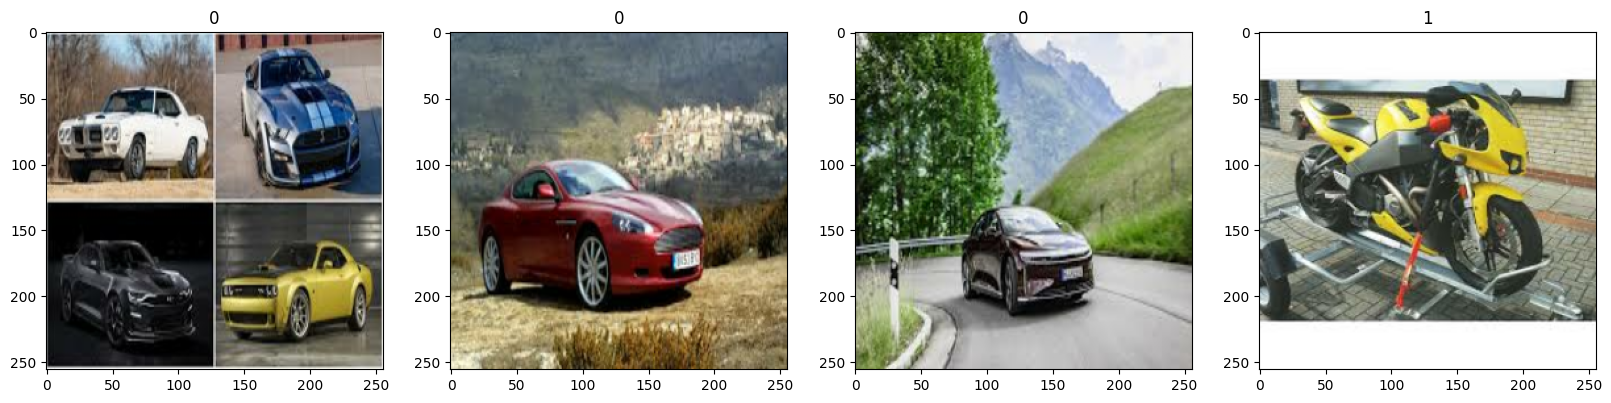

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
batch[0].max()

1.0

# Split Data

In [20]:
len(data)

11

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building DL Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5365 - loss: 1.1478 - val_accuracy: 0.5000 - val_loss: 0.6862
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5906 - loss: 0.6517 - val_accuracy: 0.5000 - val_loss: 0.6636
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6459 - loss: 0.6431 - val_accuracy: 0.5312 - val_loss: 0.6583
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6401 - loss: 0.6214 - val_accuracy: 0.7656 - val_loss: 0.5890
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7010 - loss: 0.5810 - val_accuracy: 0.8438 - val_loss: 0.5102
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8868 - loss: 0.4758 - val_accuracy: 0.8906 - val_loss: 0.3879
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8795 - loss: 0.3570 - val_accuracy: 0.8594 - val_loss: 0.3602
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8751 - loss: 0.3188 - val_accuracy: 0.9375 - val_loss: 0.2023
Epoch 9/

# Plot Model Performance

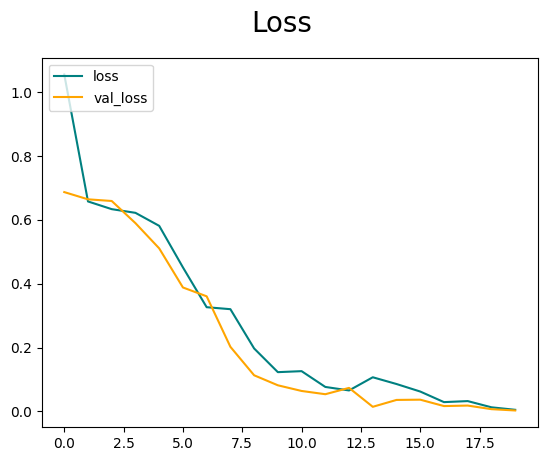

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

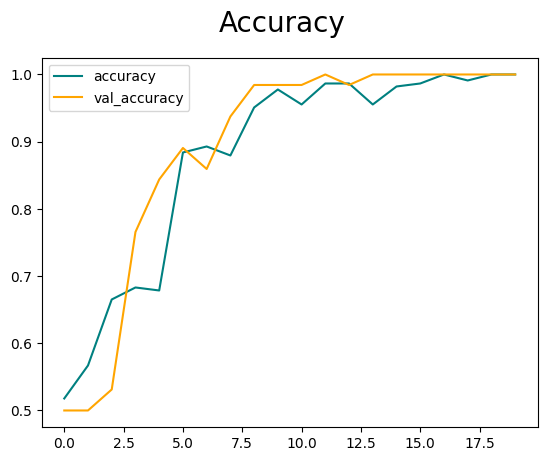

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Model Performance

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Test Model

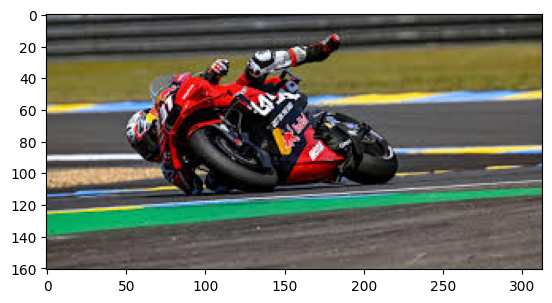

In [52]:
img = cv2.imread('test_images/motorcycle_test1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

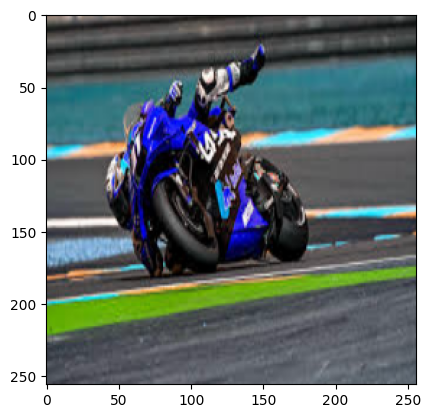

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [55]:
yhat

array([[0.9998889]], dtype=float32)

In [56]:
if yhat > 0.5:
    print(f'Predicted class is Motorcycle')
else:
    print(f'Predicted class is Car')

Predicted class is Motorcycle


# Save the Model

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','vehicleclassifier.h5'))

# Load Model

In [59]:
new_model = load_model(os.path.join('models','vehicleclassifier.h5'))

# Make New Prediction

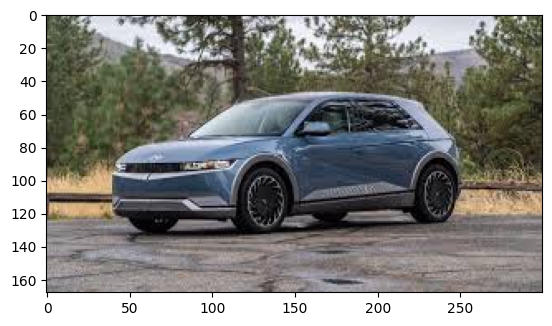

In [61]:
img = cv2.imread('test_images/car_test2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

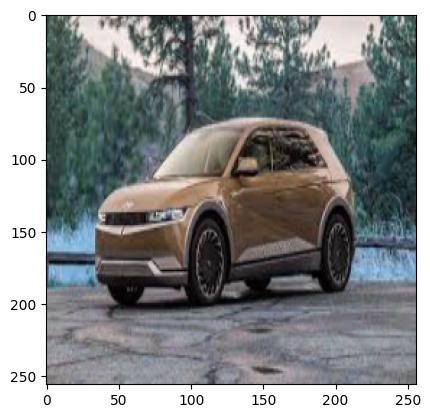

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [66]:
if yhatnew > 0.5:
    print(f'Predicted class is Motorcycle')
else:
    print(f'Predicted class is Car')

Predicted class is Car
